# Modelo SIR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import DFSOLVE as dflib
from importlib.machinery import SourceFileLoader

plt.rc('figure',figsize=(15,10))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend',fontsize=20)
plt.rc('lines',linewidth=5, markersize=10)

In [2]:
def funcionv(t, _Y, gamma=0.35, beta=0.1):
    """
    Parámetros
    ==========
    Y = [S, I, R]
    """
    _Y = _Y.ravel()
    _dY = [ 
            -gamma*_Y[1]*_Y[0],
            gamma*_Y[1]*_Y[0]-beta*_Y[1],
            beta*_Y[1]
        ]
    return np.array(_dY).reshape(-1,1)


In [3]:
t = np.linspace(0,100, 1000)
dt = np.diff(t)
Y0 = np.array( [[0.9],  [0.1] , [0.0]]) # = [ S0, I0, R0]

In [46]:
def simulacion(_gamma, _beta, _Y0):
    _Y = _Y0.copy()
#    _gamma = 0.9 # tasa de contagios
#    _beta = 0.01 # tasa de recuperaciion
    newfunv = lambda t, sir: funcionv(t, sir, gamma = _gamma, beta = _beta)
    for i, _dt in enumerate(dt):
        _Y = np.hstack((_Y, dflib.paso_RK(_dt, t[i], _Y[:,-1].reshape(-1,1), newfunv)))
    return _Y

Text(0.5, 0.9, 'gamma / beta  = 10')

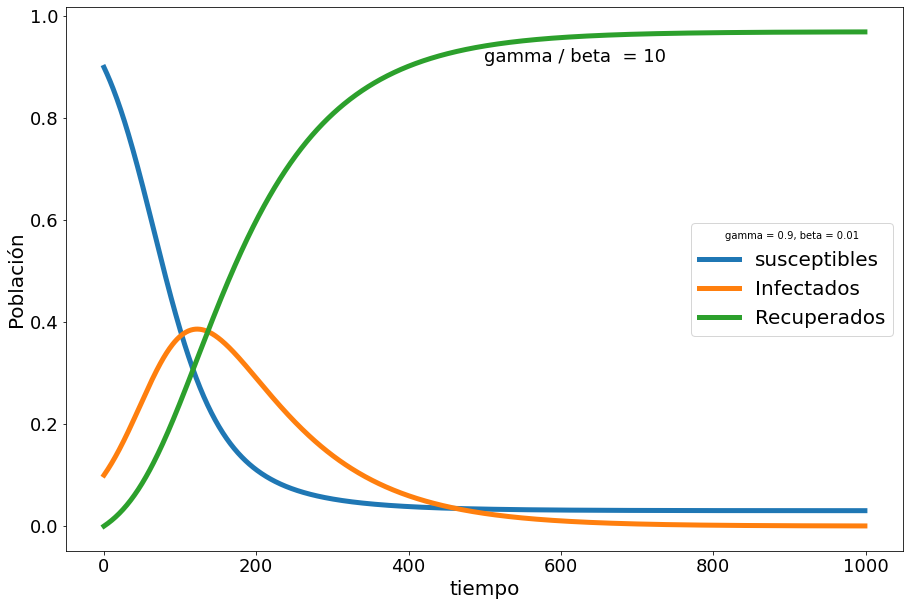

In [52]:
Y10=simulacion(0.35, 0.1, Y0)

plt.plot(Y10[0,:], label='susceptibles')
plt.plot(Y10[1,:], label='Infectados')
plt.plot(Y10[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')
plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = 10', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)

Text(0.5, 0.9, 'gamma / beta  = 10')

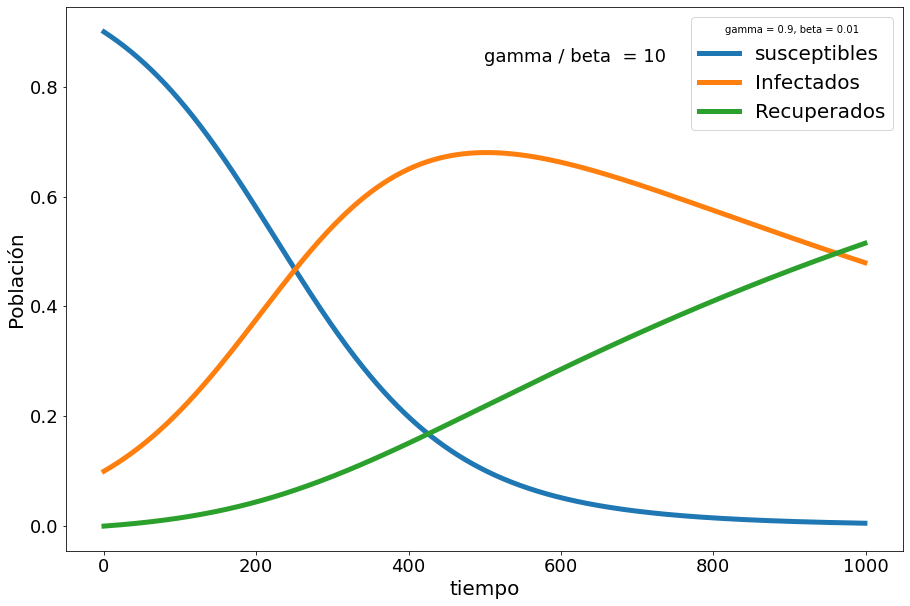

In [53]:
Y10=simulacion(0.1, 0.01, Y0)

plt.plot(Y10[0,:], label='susceptibles')
plt.plot(Y10[1,:], label='Infectados')
plt.plot(Y10[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')
plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = 10', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)

Text(0.5, 0.9, 'gamma / beta  = 100')

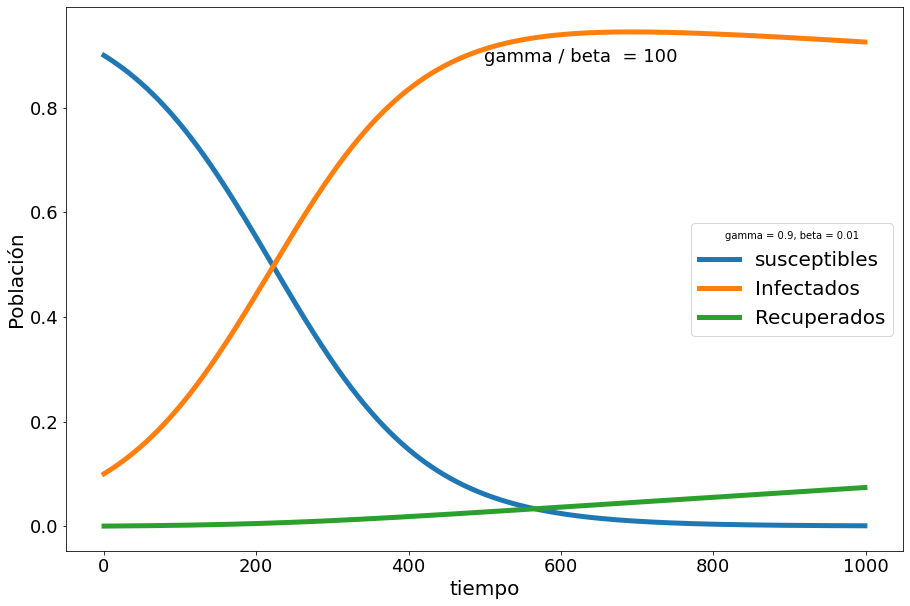

In [54]:
Y100=simulacion(0.1, 0.001, Y0)

plt.plot(Y100[0,:], label='susceptibles')
plt.plot(Y100[1,:], label='Infectados')
plt.plot(Y100[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')
plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = 100', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)

Text(0.5, 0.9, 'gamma / beta  = 0.8')

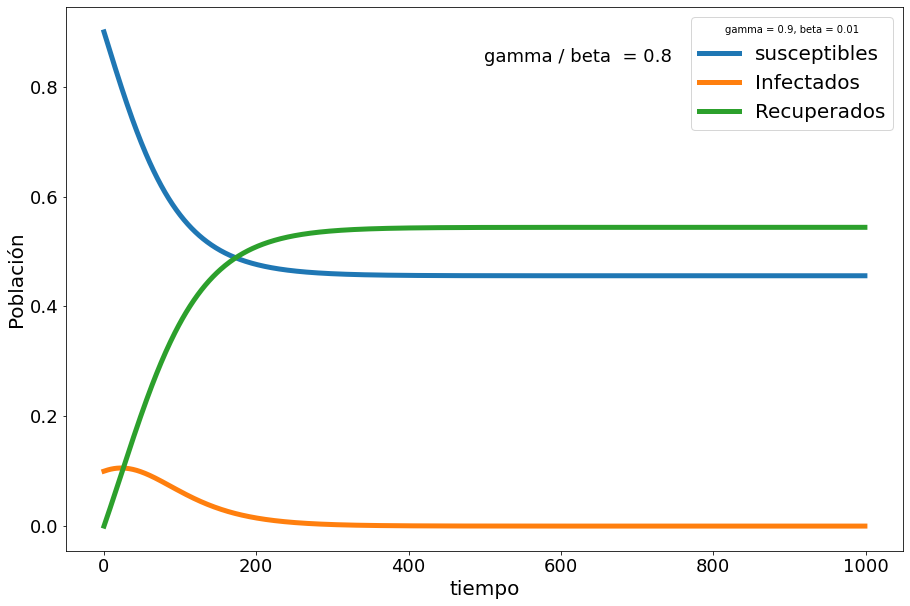

In [55]:
Y100=simulacion(0.5, 0.4, Y0)

plt.plot(Y100[0,:], label='susceptibles')
plt.plot(Y100[1,:], label='Infectados')
plt.plot(Y100[2,:],label='Recuperados')
plt.ylabel('Población')
plt.xlabel('tiempo')
plt.legend(title='gamma = {}, beta = {}'.format(_gamma, _beta))
plt.annotate('gamma / beta  = 0.8', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=18)